## Experiment

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [40]:
results_df = pd.read_csv('results.csv')

In [42]:
results_df.iloc[3200]

status        fixed_pe
train_acc        0.725
train_cost    0.538029
test_acc          0.91
test_cost     0.410851
step                 1
Name: 3200, dtype: object

In [43]:
df_agg = results_df.groupby(["status", "step"]).agg(["mean", "std"]).reset_index()
df_agg

status step train_acc           train_cost           test_acc            \
                     mean       std       mean       std     mean       std   
0      amp    1  0.448437  0.263428   0.744612  0.112783  0.66375  0.202480   
1      amp    2  0.640625  0.206993   0.632063  0.100762  0.82125  0.139636   
2      amp    3  0.812500  0.132961   0.534069  0.089168  0.90250  0.075166   
3      amp    4  0.901562  0.069255   0.450116  0.078256  0.95375  0.029731   
4      amp    5  0.951562  0.033030   0.379172  0.068193  0.98000  0.016903   
..     ...  ...       ...       ...        ...       ...      ...       ...   
595    old   96  1.000000  0.000000   0.007351  0.001439  1.00000  0.000000   
596    old   97  1.000000  0.000000   0.007277  0.001377  1.00000  0.000000   
597    old   98  1.000000  0.000000   0.007222  0.001405  1.00000  0.000000   
598    old   99  1.000000  0.000000   0.007102  0.001392  1.00000  0.000000   
599    old  100  1.000000  0.000000   0.007033  0.001381  1.00000  0.000000   

    test_cost            
         mean       std  
0    0.620530  0.103884  
1    0.526590  0.091010  
2    0.445751  0.078906  
3    0.377163  0.067809  
4    0.319613  0.057888  
..        ...       ...  
595  0.010872  0.002388  
596  0.010801  0.002341  
597  0.010625  0.002327  
598  0.010548  0.002382  
599  0.010425  0.002346  

[600 rows x 10 columns]

['new', 'old', 'norm', 'amp', 'fixed_pe', 'learned_pe']
[0.003147092240396888, 0.003392291895579524, 0.0033143892069347125, 0.003340241790283462, 0.003718677442520836, 0.005198368686251326]


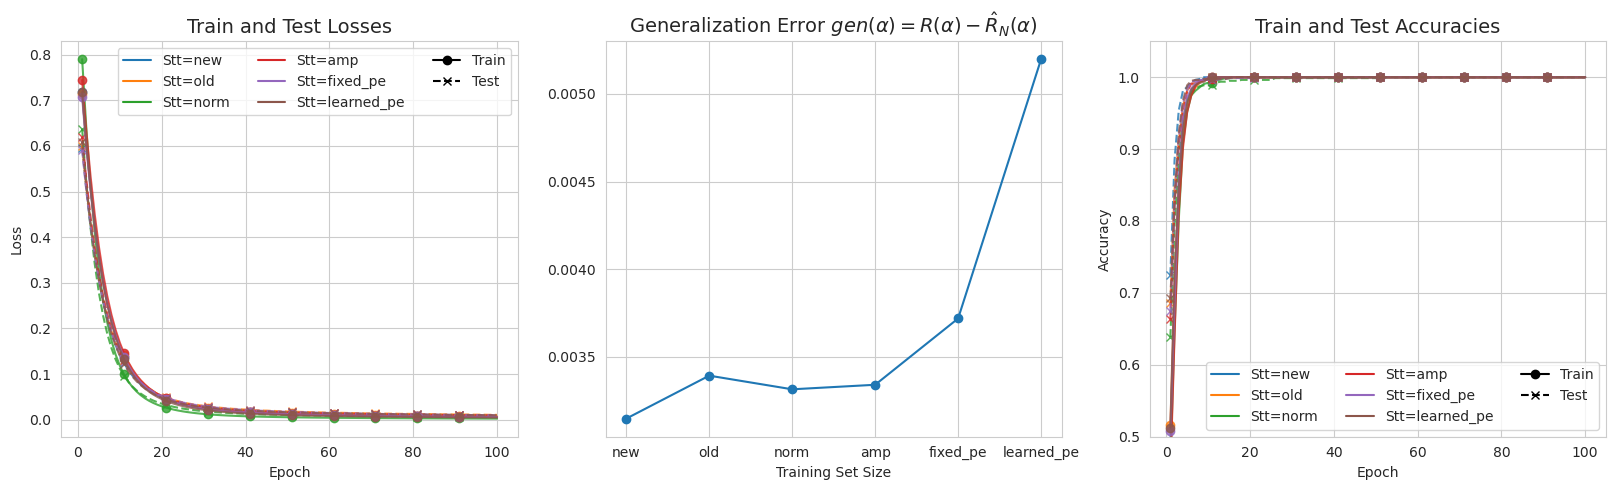

In [44]:
# Plotting
status=['new','old','norm','amp','fixed_pe','learned_pe']
sns.set_style('whitegrid')
colors = sns.color_palette()
fig, axes = plt.subplots(ncols=3, figsize=(16.5, 5))

generalization_errors = []

# Plot losses and accuracies
for i, stt in enumerate(status):
    df = df_agg[df_agg.status == stt]
    dfs = [df.train_cost["mean"], df.test_cost["mean"], df.train_acc["mean"], df.test_acc["mean"]]
    lines = ["o-", "x--", "o-", "x--"]
    labels = [fr"$N={stt}$", None, fr"$N={stt}$", None]
    axs = [0, 0, 2, 2]

    for k in range(4):
        ax = axes[axs[k]]
        ax.plot(df.step, dfs[k], lines[k], label=labels[k], markevery=10, color=colors[i], alpha=0.8)

    # Compute generalization error
    dif = df[df.step == 100].test_cost["mean"].values[0] - df[df.step == 100].train_cost["mean"].values[0]
    generalization_errors.append(dif)
print(status)
print(generalization_errors)
# Format plots
axes[0].set_title('Train and Test Losses', fontsize=14)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')

axes[1].plot(status, generalization_errors, "o-", label=r"$gen(\alpha)$")
# axes[1].set_xscale('log')
axes[1].set_xticks(status)
axes[1].set_xticklabels(status)
axes[1].set_title(r'Generalization Error $gen(\alpha) = R(\alpha) - \hat{R}_N(\alpha)$', fontsize=14)
axes[1].set_xlabel('Training Set Size')
# axes[1].set_yscale('log', base=2)

axes[2].set_title('Train and Test Accuracies', fontsize=14)
axes[2].set_xlabel('Epoch')
axes[2].set_ylabel('Accuracy')
axes[2].set_ylim(0.5, 1.05)

legend_elements = (
    [mpl.lines.Line2D([0], [0], label=f'Stt={n}', color=colors[i]) for i, n in enumerate(status)] +
    [
        mpl.lines.Line2D([0], [0], marker='o', ls='-', label='Train', color='Black'),
        mpl.lines.Line2D([0], [0], marker='x', ls='--', label='Test', color='Black')
    ]
)

axes[0].legend(handles=legend_elements, ncol=3)
axes[2].legend(handles=legend_elements, ncol=3)

plt.tight_layout()
plt.show()